In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# dataset
df = pd.read_csv('Mall_Customers.csv')
print("Original Data : ")
print(df.head())

Original Data : 
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [2]:
# Feature Engineering
df['Annual_Income(Rs.)'] = df['Annual Income (k$)'] * 1000 * 85
df['Spending_Score'] = df['Spending Score (1-100)']
df = df.drop(['CustomerID','Annual Income (k$)', 'Spending Score (1-100)'],axis=1)

# One Hot Encoding  (Categorical data to numerical data)
# Gender = Gender_male (0 / 1)
df = pd.get_dummies(df,columns=['Gender'],drop_first=True,prefix=['Gender'])
print(df.head())

   Age  Annual_Income(Rs.)  Spending_Score  Gender_Male
0   19             1275000              39         True
1   21             1275000              81         True
2   20             1360000               6        False
3   23             1360000              77        False
4   31             1445000              40        False


In [3]:
#Standardize the values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print("Scaled data : ")
print(scaled_data[:3])

Scaled data : 
[[-1.42456879 -1.73899919 -0.43480148  1.12815215]
 [-1.28103541 -1.73899919  1.19570407  1.12815215]
 [-1.3528021  -1.70082976 -1.71591298 -0.88640526]]


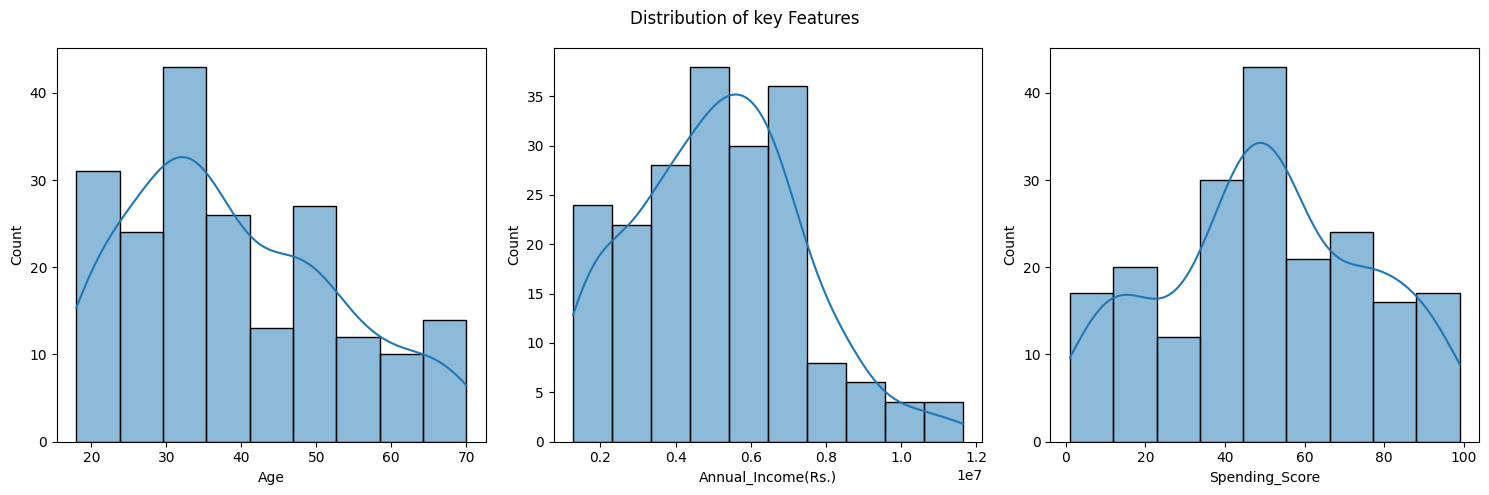

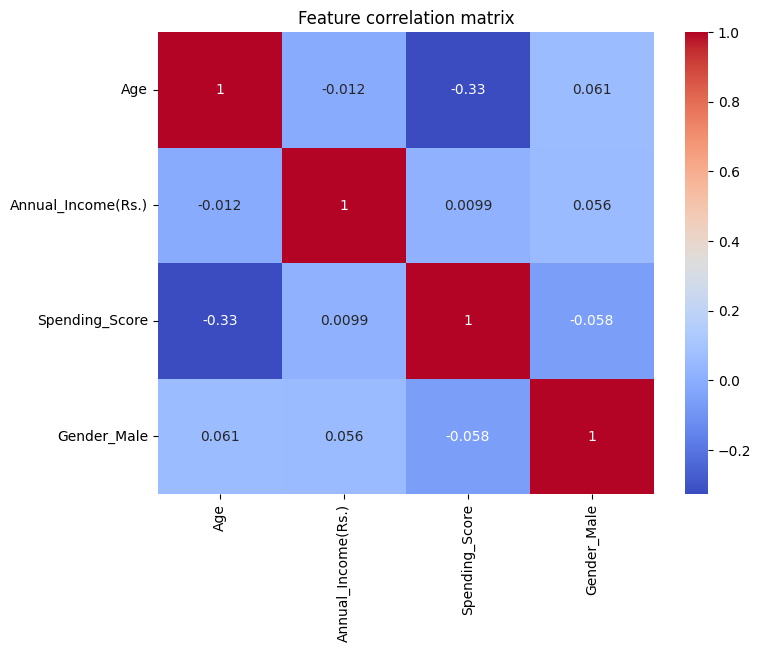

In [6]:
# Exploratory Data Analysis
plt.figure(figsize=(15,5))
for i,col in enumerate(['Age','Annual_Income(Rs.)','Spending_Score']):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col],kde=True)
plt.suptitle('Distribution of key Features')
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Feature correlation matrix')
plt.show()

In [ ]:
# PCA (optional)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components,columns=['PC1','PC2'])

print("Variance ratio : " , pca.explained_variance_ratio_)
df.head()

Variance ratio :  [0.33690046 0.26230645]


,Age,Annual_Income(Rs.),Spending_Score,Gender_Male
0,19,1275000,39,True
1,21,1275000,81,True
2,20,1360000,6,False
3,23,1360000,77,False
4,31,1445000,40,False


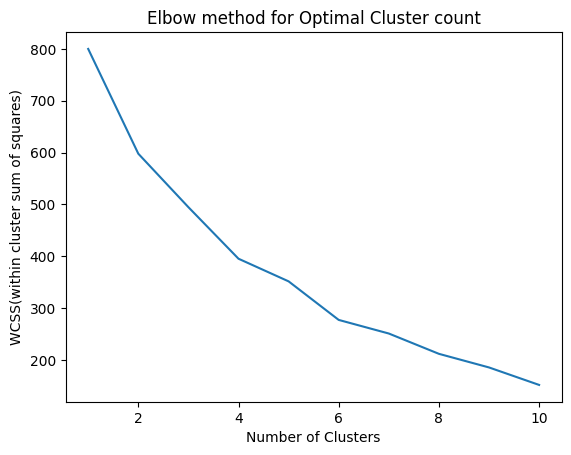

In [15]:
# K means clustering
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

#Elbow method plot
plt.plot(range(1,11),wcss)
plt.title('Elbow method for Optimal Cluster count')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS(within cluster sum of squares)")
plt.show()

# Final Clustering (using 5 clusters)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

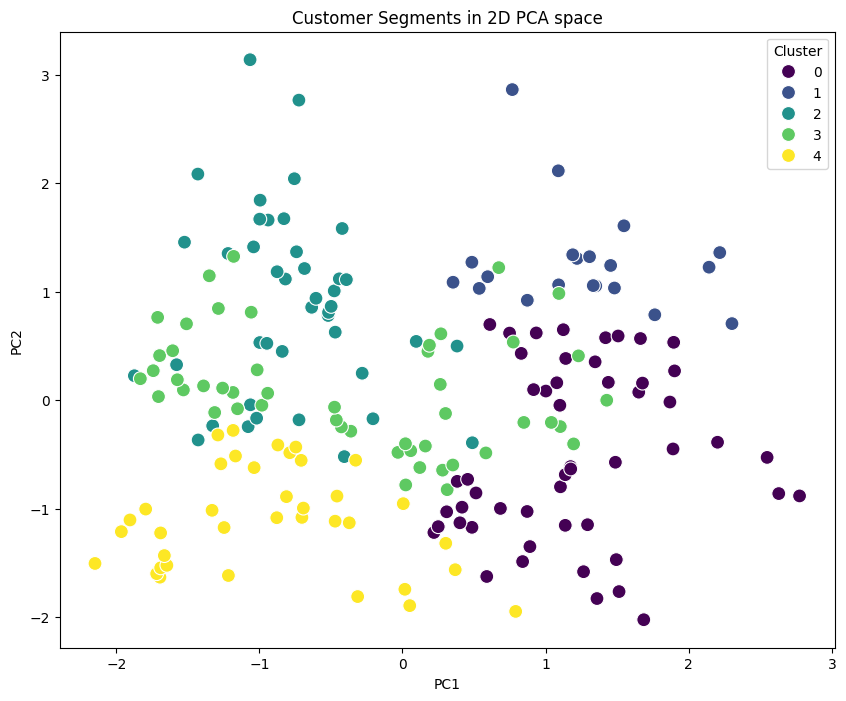

In [20]:
# Visualization for PCA + Clusters
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments in 2D PCA space')
plt.show()

# Cluster Profiles
# cluster_profile = df.groupby('Cluster').mean()
# print("\nCluster Profiles:")
# print(cluster_profile)

# #Heatmap for Cluster characteristics
# plt.figure(figsize=(10,6))
# sns.heatmap(cluster_profile.T,cmap='YlGnBu',annot=True,fmt=".1f")
# plt.title('Average feature Values per cluster')
# plt.show()

In [21]:

df['PC1'] = pca_df['PC1']
df['PC2'] = pca_df['PC2']

df.to_csv('Mall_Customers_Transformed.csv', index=False)

print("✅ Transformed data saved to 'Mall_Customers_Transformed.csv'")


✅ Transformed data saved to 'Mall_Customers_Transformed.csv'
